# Data Analysis Project of Electronics Products Sales

###  Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,glob

cwd = os.path.abspath("Sales_Data")
filelist = os.listdir(cwd)

### Merge CSV files

In [2]:
#merge all csv files together into one dataframe object
df_append = pd.DataFrame()
for file in filelist :
    df = pd.read_csv("./Sales_Data/" +file)
    df_append = pd.concat([df_append,df])
df_append.to_csv("all_data.csv",index = False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Remove NaN's

In [4]:

nan_df=all_data[all_data.isna().any(axis=1)]
nan_df
all_data = all_data.dropna(how="any")
# all_data

### Add month column and Remove Or

In [5]:
all_data['month'] = all_data["Order Date"].str[:2]
all_data = all_data[all_data['month'].str[:2] != "Or"]
# all_data.head()

### convert columns to right data type

In [6]:
all_data['month'] = all_data['month'].astype("int32") # to int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data["Price Each"])
# all_data['month']
# all_data.head()

### Add Sales column

In [7]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### make city column

In [8]:
def get_state(address):
    return address.split(",")[2].split(' ')[1]
def get_city(address):
    return address.split(",")[1]

# all_data['Purchase Address'].apply(lamda)
all_data['city'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


### What was the best month for sales? 

In [9]:
# Use groupby

results = all_data.groupby("month").sum()
# results

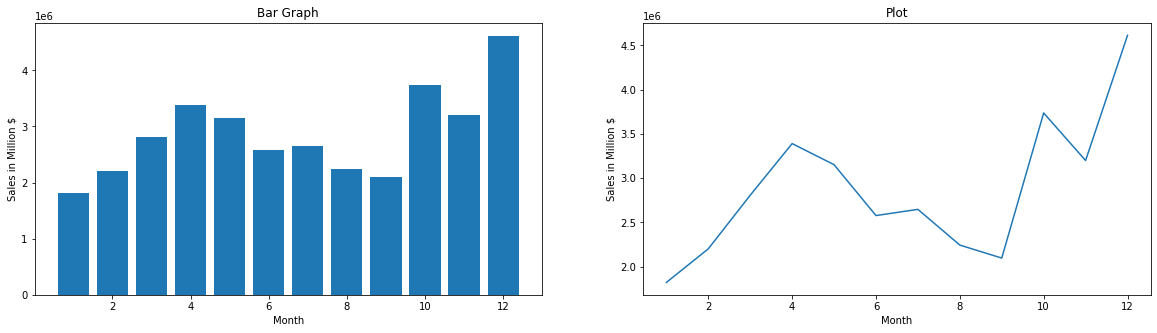

In [10]:
# Plot month v/s Sales
x= range(1,13) #Months
y = results['sales'] #sales per month

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Bar Graph")
plt.xlabel("Month")
plt.ylabel("Sales in Million $")
plt.bar(x,y)


plt.subplot(1,2,2)
plt.title("Plot")
plt.xlabel("Month")
plt.ylabel("Sales in Million $")
plt.plot(x,y)

plt.show()

### What city has highest number of sales?

In [11]:
city_results = all_data.groupby("city").sum()


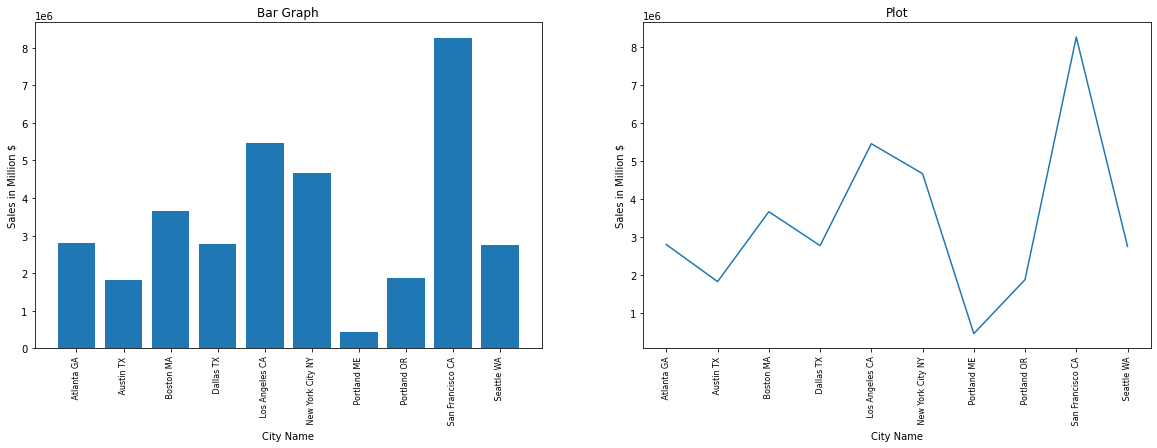

In [12]:
x_2 = all_data['city'].unique()
y_2 = city_results['sales']

x_2 = [city for city, df in all_data.groupby('city')]

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title("Bar Graph")
plt.xlabel("City Name")
plt.ylabel("Sales in Million $")
plt.bar(x_2,y_2)
plt.xticks(x_2,rotation='vertical', size=8)


plt.subplot(1,2,2)
plt.title("Plot")
plt.xlabel("City Name")
plt.ylabel("Sales in Million $")
plt.plot(x_2,y_2)
plt.xticks(x_2,rotation='vertical', size=8)

plt.show()

### What time should we advertise to maximize the likelihood of customers buying products?

In [13]:
# convert order date to datetime object
# all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

### Create an hour column


In [14]:
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute
all_data['count'] =1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute,count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,1


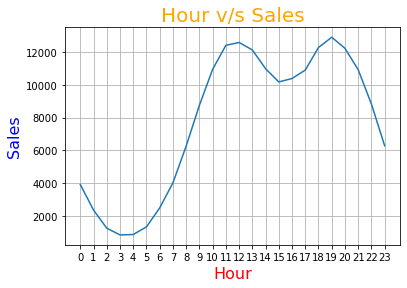

In [29]:
hours = [hour for hour, df in all_data.groupby('hour')]
plt.plot(hours, all_data.groupby(['hour']).count()['count'])

plt.title("Hour v/s Sales",color="orange",fontsize=20)
plt.xlabel("Hour",color="red",fontsize=16)
plt.ylabel("Sales",color="blue",fontsize=16)
plt.xticks(hours)
plt.grid()
plt.show()